In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib import rc, rcParams
import scipy as sc
import pandas as pd
from scipy.interpolate import make_interp_spline, BSpline
from scipy.ndimage.filters import gaussian_filter1d


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
     obs          time  elapsed               date    hhmmss          TIME  \
0      1  1.607443e+09      0.0  20201208 16:03:10  16:03:10  1.607443e+09   
1      2  1.607443e+09     60.0  20201208 16:04:10  16:04:10  1.607443e+09   
2      3  1.607444e+09    120.0  20201208 16:05:10  16:05:10  1.607444e+09   
3      4  1.607444e+09    180.0  20201208 16:06:10  16:06:10  1.607444e+09   
4      5  1.607444e+09    240.0  20201208 16:07:10  16:07:10  1.607444e+09   
..   ...           ...      ...                ... 

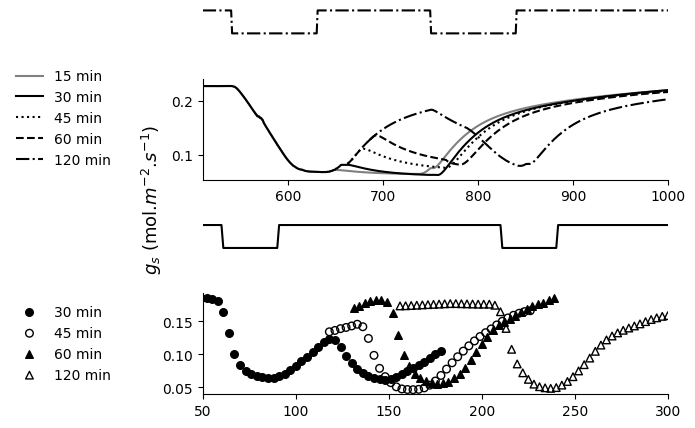

In [6]:

L30 =  pd.read_excel(r'C:\Users\emmap\OneDrive - University of Glasgow\Documents\L4\Project\LiCOR\Method optimisation\Raw Data\21 11 02 30D30L_WT#1.xlsx',skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17])
L45 = pd.read_excel(r'C:\Users\emmap\OneDrive - University of Glasgow\Documents\L4\Project\LiCOR\Method optimisation\Raw Data\21 11 03 30D45L WT#2 BE.xlsx',skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17])
L60 = pd.read_excel(r'C:\Users\emmap\OneDrive - University of Glasgow\Documents\L4\Project\LiCOR\Method optimisation\Raw Data\21 11 04_30D60L_WT#3_BE.xlsx',skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17])
L120 = pd.read_excel(r'C:\Users\emmap\OneDrive - University of Glasgow\Documents\L4\Project\LiCOR\Method optimisation\Raw Data\21 11 05_30D120L_WT#3_BE.xlsx',skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17])

fig, (ax1, ax2, ax3,ax4) = plt.subplots(4,1,figsize=(6,5), gridspec_kw={'height_ratios': [1, 4, 1, 4]})

fig.subplots_adjust(hspace=0.7)


#Making a new column with transformed (normalised) data
L30['transformed'] = (L30['gsw'] / L30['gsw'][50]) * L45["gsw"][50] 
L60['transformed'] = (L60["gsw"]/ L60["gsw"][50] ) * L45["gsw"][50] 
L120['transformed'] = (L120['gsw'] / L120["gsw"][50]) * L45["gsw"][50] 


#this change our variables to smooth variable


L30smoothed = gaussian_filter1d(L30["transformed"], sigma=3)
L45smoothed = gaussian_filter1d(L45["gsw"][117:], sigma=3)
L60smoothed = gaussian_filter1d(L60["transformed"][130:], sigma=3)
L120smoothed = gaussian_filter1d(L120["transformed"][155:], sigma=3)


#plotting the real data

ax4.scatter(L30['obs'][::3], L30smoothed[::3], s=30, color="black",label='30 min')
ax4.scatter(L45['obs'][117::3], L45smoothed[::3], s=30, facecolors='none', edgecolors='black',label='45 min')
ax4.scatter(L60['obs'][130::3], L60smoothed[::3], s=30, color='black', marker="^", label='60 min')
ax4.scatter(L120['obs'][155::3], L120smoothed[::3], s=30, facecolors='none', edgecolors='black', marker="^",label='120 min')
ax4.legend(loc="lower right", fontsize=10, bbox_to_anchor=(-0.17, 0), frameon=False)


ax3.set_xlim(50,300)


#plotting the light protocol
ax3.plot(L120['obs'], L120['Qin'], color="black")




ax3.axis('off')
ax1.axis('off')

#######################################


#OnGuard data


mL15 =  pd.read_csv(r'C:\Users\emmap\OneDrive - University of Glasgow\Documents\L4\Project\OnGuard\HoTSig-3\Data\Varied light\15L-001.csv')
mL30 = pd.read_csv(r'C:\Users\emmap\OneDrive - University of Glasgow\Documents\L4\Project\OnGuard\HoTSig-3\Data\Varied light\30L-001.csv')
mL45 = pd.read_csv(r'C:\Users\emmap\OneDrive - University of Glasgow\Documents\L4\Project\OnGuard\HoTSig-3\Data\Varied light\45L-001.csv')
mL60 = pd.read_csv(r'C:\Users\emmap\OneDrive - University of Glasgow\Documents\L4\Project\OnGuard\HoTSig-3\Data\Varied light\60L-001.csv')
mL120 = pd.read_csv(r'C:\Users\emmap\OneDrive - University of Glasgow\Documents\L4\Project\OnGuard\HoTSig-3\Data\Varied light\120L-001.csv')




ax2.plot(mL15['Time /min'], mL15["g' /mmol/m2/s"]/1000, color="grey", label='15 min ')
ax2.plot(mL30['Time /min'][650:], (mL30["g' /mmol/m2/s"]/1000)[650:], color="black",label='30 min ')
ax2.plot(mL45['Time /min'][640:], (mL45["g' /mmol/m2/s"]/1000)[640:], ":", color="black", label='45 min ')
ax2.plot(mL60['Time /min'][640:], (mL60["g' /mmol/m2/s"]/1000)[640:],"--",color="black", label='60 min')
ax2.plot(mL120['Time /min'][660:], (mL120["g' /mmol/m2/s"]/1000)[660:], "-.", color="black", label='120 min')
ax2.legend(loc="lower right", fontsize=10, bbox_to_anchor=(-0.17, 0), frameon=False)

#defining x limit

ax4.set_xlim([50,300])
ax2.set_xlim([510,1000])
ax1.set_xlim([510,1000])

#plotting the OnGuard light protocol
ax1.plot(mL120['Time /min'], mL120['Fl-Tot/uE'],"-.", color="black")





ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)


rc('axes', linewidth=10)


#Setting title and y/x axis

#rcParams["mathtext.fontset"] 

#fig1.supxlabel("Time [min]", size=15 )
fig.supylabel("$g_{s}$ (mol.$m^{-2}$.$s^{-1}$)", size=13, )


#Saving figure
#plt.savefig('graphs/varied light.png', dpi=300, bbox_inches='tight')

